In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Kolikon heittoa</h2>

Simuloin kolikon heittoa miljoona kertaa tuottamalla sattumanvaraisesti nollia ja ykkösiä. Tulokset tallennan heitot-nimiseen muuttujaan.

In [2]:
heitot = np.random.randint(2, size = 1000000)

print('Kruunuja:', str(np.sum(heitot)), 'Klaavoja:', str(np.sum(1 - heitot)))

Kruunuja: 500117 Klaavoja: 499883


Muodostan listan, joka kertoo kuinka monta kertaa sama tulos tulee peräkkäin. Jos esimerkiksi tulee kolme klaavaa, sitten yksi kruunu ja sen jälkeen neljä klaavaa, niin listaan tulee 3, 1, 4. Listan nimeksi annan sarjat.

In [3]:
sarjat = []
sarja = 1

for i in range(len(heitot) - 1):
    if heitot[i] == heitot[i + 1]:
        sarja += 1
    else:
        sarjat.append(sarja)
        sarja = 1
sarjat.append(sarja)

Lasken sarjat-listassa esiintyvien lukujen lukumäärät. Kuten huomaat, niin jopa yli kymmenen peräkkäisen kruunun tai klaavan sarjoja on melko paljon.

In [4]:
from collections import Counter

laskuri = Counter(sarjat)

pd.DataFrame(data = Counter(laskuri).values(), index = Counter(laskuri).keys(), columns = ['lkm']).sort_index()

,lkm
1,250083
2,124863
3,62490
4,31445
5,15410
6,7813
7,3906
8,1926
9,1023
10,499


<h2>Kahden nopan heittoa</h2>

Seuraavassa heitän kahta noppaa tuhat kertaa ja tallennan tulokset heitot-nimiseen muuttujaan.

Lasken eri silmälukujen määrät kummallekin nopalle ja parien määrät.

In [5]:
# random.randint(6) tuottaa lukuja 0 - 5; lisätään 1, jotta saadaan nopan silmälukuja 1 - 6
heitot = np.random.randint(6, size = (1000, 2)) + 1

# dataframe tulosten esittämistä varten
tulokset = pd.DataFrame(columns = ['Tulos', 'Eka', 'Toka', 'Pareja'])

# for silmukka käy läpi i:n arvot 1 - 6
for i in range(1, 7):
    
    eka = heitot[:,0] == i # ensimmäinen noppa
    
    toka = heitot[:,1] == i # toinen noppa
    
    parit = eka & toka # pari (molemmilla sama tulos)
    
    # Lisätään silmälukuun liittyvät lukumäärät dataframeen
    tulokset = tulokset.append({'Tulos' : i, 'Eka' : eka.sum(), 'Toka' : toka.sum(),
                              'Pareja' : parit.sum()}, ignore_index = True)

tulokset

,Tulos,Eka,Toka,Pareja
0,1,169,158,29
1,2,176,161,24
2,3,169,177,24
3,4,148,173,24
4,5,171,177,29
5,6,167,154,24


Esitän lopuksi kahden nopan silmälukujen summan jakauman

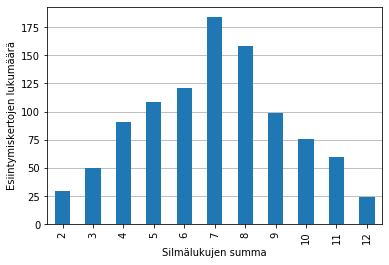

In [6]:
df = pd.DataFrame(heitot)
df['sum'] = df.sum(axis=1)

ax = df['sum'].value_counts(sort = False).plot.bar()

#Pientä tuunausta
ax.set_xlabel('Silmälukujen summa')
ax.set_ylabel('Esiintymiskertojen lukumäärä')
ax.grid(axis = 'y')
ax.set_axisbelow(True)